#### 1.6 .Visualisation and identifying the most prescribed drug by Speciality

##### Feature Selection

In this section, I will select specific features for model training. The original dataset contains 265 features, most of which are categorical attributes, dominantly the list of drug names that are approved as pain medications that need special AED licensed prescriber.Here,my main target is to predict the overdoses using the  the list of prescriber specialists with NPI information and the FDA approved drug lists. The data set has only total opiod cliams and total claim counts and i took the standard prescription for opiod drugs is 84 days which is 12 weeks. Therefore, an additional feature was created in the data cleaning, pre processing that shows avg_op_supply which i limit to the standard to be 84 and any ones who prescribes the category of medications under the controlled substance act(CSA). The CSA is used for organizing drugs based on the risk of abuse or harm to users in five and my capestone focuses on the approved by [FDA](https://www.fda.gov/drugs/drugsafety/informationbydrugclass/ucm251735.htm) and [DEA](https://www.deadiversion.usdoj.gov/schedules/) to be prescribed by licensed and certified health professional.  These drug lists that are considered controlled substances under the Controlled Substances Act (CSA) are divided into five schedules.  An updated and complete list of the schedules is published annually in [Title 21 Code of Federal Regulations (C.F.R.) §§ 1308.11 through 1308.15](https://www.deadiversion.usdoj.gov/21cfr/cfr/2108cfrt.htm).

Therfore, for analysis and visualization  i only took those physicians who have greater opood cliams from the center for medical services dataset and created a feature average opiod supply  by dividing the total cliam by the opiod cliam and reviewed those specialists who prescribe more than the set limit of 12 weeks and that also become a new feature that measures the length of opiod prescription supply more than 84 days. As been visualized in notebook 1.3, significant amount of prescribers are family physicians, followed by internal medicine,nurse practitioners, Physicain Assistant and physical medicine and rehabilitation. When i group based on speciality and the vsuals can be accessed   [here top 20](https://plot.ly/~kiros/112) and the lists are as follows:-
  > $'Cardiology', 'Nephrology', 'Endocrinology', 'Neurology'  'General Practice', 'Internal Medicine', 'Urology'$,   > $'Pulmonary Disease', 'Gastroenterology', 'Family Practice', 'Infectious Disease','Psychiatry'$ 
  >$'Nurse Practitioner', 'Ophthalmology','Allergy/Immunology', 'Otolaryngology', 'Psychiatry & Neurology'$ , $'Rheumatology', 'Dermatology', 'Obstetrics/Gynecology'$

**Author : Kiros Gebremariam**

Cohorts of the Data Science Immersive, General Assembly @ Washington DC campus

<b>Importing packages and csv files.</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import re
import csv

from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})

# setting visual
sns.set(font_scale=1)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Print version info for the sake of reproducibility
import sys
import matplotlib as mpl
import sklearn as skl
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)
print("sklearn" + skl.__version__)

python 3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]

pandas 0.23.0
numpy 1.14.5
matplotlib 2.2.2
seaborn 0.8.1
sklearn0.19.1


In [3]:
opioids = pd.read_csv('./inputs/list_opioids.csv')
prescribers = pd.read_csv('./inputs/cleaned_prescriber_info18.csv')


/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<b>Viewing raw data and statistics.</b>

In [4]:
prescribers.head()

,NPI,Gender,State,Credentials,Specialty,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Totalclaimcount,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
0,1003002320,M,MS,D.M.D. P.A.,Dentist,EKLUND,D.,39208.0,MS,129,...,0,0,0,0,0,0,4.5,1.0,1,1.0
1,1003004771,F,CO,M.D.,Pulmonary Disease,RIGGLE,ERIN,80120.0,CO,537,...,0,0,16,0,0,0,4.5,0.0,0,0.0
2,1003008475,F,GA,NP,Nurse Practitioner,DAVIS,JENNIFER,31533.0,GA,299,...,0,0,0,0,0,0,4.5,0.0,1,1.0
3,1003009630,M,NY,MD,Emergency Medicine,SINGLETARY,ROBERT,11215.0,NY,320,...,0,0,0,0,0,0,4.1,1.0,1,1.0
4,1003016270,M,CT,M.D.,Family Practice,MUTHUKRISHNAN,VIJAI,6010.0,CT,4017,...,0,32,0,0,0,36,13.5,1.0,1,1.0


In [5]:
prescribers.describe()

,NPI,NPPES Provider ZIP Code,Totalclaimcount,OpioidClaimCount,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,...,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,avg_op_supply,op_longer,Opioid_Prescriber,op_prescriber
count,2.500000e+04,22390.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,22390.000000,22390.000000,25000.000000,22390.000000
mean,1.497815e+09,48156.120232,1698.879960,80.216440,2.539120,1.169320,6.938680,1.333360,8.763960,9.957560,...,1.030800,18.253280,4.92088,4.308920,1.428480,11.148480,23.306757,0.595400,1.721560,0.595578
std,2.879339e+08,30003.420351,3512.928148,264.465556,12.504745,6.805065,25.619397,9.105226,36.012932,30.567146,...,8.167705,81.237655,24.69952,19.147394,11.375485,36.323232,41.877051,0.490825,15.200218,0.490791
min,1.003002e+09,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.245430e+09,22031.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,11.200000,0.000000,0.000000,0.000000
50%,1.497834e+09,44720.000000,325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000
75%,1.740388e+09,76107.000000,1636.250000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,18.300000,1.000000,1.000000,1.000000
max,1.992999e+09,99901.000000,58397.000000,14177.000000,644.000000,356.000000,1105.000000,609.000000,2431.000000,790.000000,...,608.000000,6029.000000,826.00000,772.000000,694.000000,1707.000000,2260.400000,1.000000,1707.000000,1.000000


In [6]:
list(prescribers)

['NPI',
 'Gender',
 'State',
 'Credentials',
 'Specialty',
 'NPPES Provider Last Name',
 'NPPES Provider First Name',
 'NPPES Provider ZIP Code',
 'NPPES Provider State',
 'Totalclaimcount',
 'OpioidClaimCount',
 'ACETAMINOPHEN.CODEINE',
 'ACYCLOVIR',
 'ADVAIR.DISKUS',
 'AGGRENOX',
 'ALENDRONATE.SODIUM',
 'ALLOPURINOL',
 'ALPRAZOLAM',
 'AMIODARONE.HCL',
 'AMITRIPTYLINE.HCL',
 'AMLODIPINE.BESYLATE',
 'AMLODIPINE.BESYLATE.BENAZEPRIL',
 'AMOXICILLIN',
 'AMOX.TR.POTASSIUM.CLAVULANATE',
 'AMPHETAMINE.SALT.COMBO',
 'ATENOLOL',
 'ATORVASTATIN.CALCIUM',
 'AVODART',
 'AZITHROMYCIN',
 'BACLOFEN',
 'BD.ULTRA.FINE.PEN.NEEDLE',
 'BENAZEPRIL.HCL',
 'BENICAR',
 'BENICAR.HCT',
 'BENZTROPINE.MESYLATE',
 'BISOPROLOL.HYDROCHLOROTHIAZIDE',
 'BRIMONIDINE.TARTRATE',
 'BUMETANIDE',
 'BUPROPION.HCL.SR',
 'BUPROPION.XL',
 'BUSPIRONE.HCL',
 'BYSTOLIC',
 'CARBAMAZEPINE',
 'CARBIDOPA.LEVODOPA',
 'CARISOPRODOL',
 'CARTIA.XT',
 'CARVEDILOL',
 'CEFUROXIME',
 'CELEBREX',
 'CEPHALEXIN',
 'CHLORHEXIDINE.GLUCONATE',
 'C

<b> Opiates are not defined in 'prescriber-info.csv'
    opioids.csv has different names often with extra “.” etc. 
    Using re.sub to only get columns in opioids.csv</b> 

In [7]:
ops = list(re.sub(r'[-\s]','.',x) for x in opioids.values[:,0])
prescribed_ops = list(set(ops) & set(prescribers.columns))

for i,drug in enumerate(prescribed_ops):
    print (i+1,drug)

1 HYDROMORPHONE.HCL
2 ACETAMINOPHEN.CODEINE
3 OXYCONTIN
4 FENTANYL
5 MORPHINE.SULFATE.ER
6 HYDROCODONE.ACETAMINOPHEN
7 OXYCODONE.ACETAMINOPHEN
8 METHADONE.HCL
9 OXYCODONE.HCL
10 TRAMADOL.HCL
11 MORPHINE.SULFATE


<b>These 11 are opioids.</b>

<b> Finding the specialty which prescribes opiates more than others. Present information by state.
   
   I will use the Column Opioid.Prescriber.</b>

In [8]:
stateCount_PrescribedOpiods = pd.DataFrame(prescribers.loc[prescribers['Opioid_Prescriber']>0])
df = pd.DataFrame(stateCount_PrescribedOpiods[['State','Specialty','Opioid_Prescriber']])

SpecGrp = df.groupby(['Specialty',])[['Opioid_Prescriber']].sum()
SpecGrpResult = SpecGrp.sort_values(by='Opioid_Prescriber', ascending=False)

<b>First, lets look at specialty.</b>

In [9]:
SpecGrpResult.head(5)

,Opioid_Prescriber
Specialty,
Family Practice,12686
Internal Medicine,11737
Psychiatry,3962
Nurse Practitioner,2517
Physician Assistant,2292


<b>Next, I will group by specialty and state. I'll sort by the top opioid prescriber.</b> 

In [10]:
Grp = df.groupby(['Specialty','State'])[['Opioid_Prescriber']].sum()
Result = Grp.sort_values(by='Opioid_Prescriber', ascending=False)
Result.head(n=20)

Opioid_Prescriber
Specialty         State                   
Internal Medicine CA                  1796
Psychiatry        MA                  1787
Family Practice   FL                  1285
Internal Medicine FL                  1052
                  PA                  1025
                  NY                  1011
Family Practice   NC                   914
                  OH                   827
                  CA                   790
                  TX                   751
                  TN                   697
Internal Medicine NJ                   651
Family Practice   PA                   615
                  GA                   573
Internal Medicine NC                   508
                  AL                   505
Family Practice   IN                   488
Psychiatry        WV                   457
Internal Medicine MA                   455
                  IL                   434

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


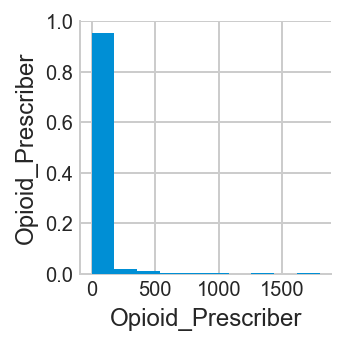

In [11]:
sns.pairplot(Result)

Here i am going to check the most “popular” opiate in the nation and to try to understand the distributionby states and specialties for the purpose of visualization in tableau. manipulating the data sometimes was not helpful to get the results needed and using the skills of applying different tools, i found it very helpful, specifically galancing and cleaning the data to visualize it in tableau needs more work in excel than in python.

In [12]:
popOpiate = prescribers[['Specialty','State','METHADONE.HCL',
 'OXYCODONE.ACETAMINOPHEN',
 'HYDROCODONE.ACETAMINOPHEN',
 'ACETAMINOPHEN.CODEINE',
 'FENTANYL',
 'TRAMADOL.HCL',
 'MORPHINE.SULFATE.ER',
 'OXYCODONE.HCL',
 'MORPHINE.SULFATE',
 'OXYCONTIN',
 'HYDROMORPHONE.HCL']]
psum = popOpiate.sum(numeric_only=True)
psum = psum.sort_values(ascending=False)
psum
popOpiate.to_csv("./inputs/popular.csv")

 The most popular opiate was found to be based on my data HYDROCODONE.ACETAMINOPHEN in most of the states and please enjoy the visuals below.

** The below link is the visual of stacked display of the drugs, grouped  by speciality and displayed by state also**
https://public.tableau.com/profile/kirosdsi.com#!/vizhome/CapstoneUSAOpiodscrisisByStateandSpeciality2018/ByStateAndSpecialty

**This link is easy work of drugs by state in map  and both of them use the same data as above its only by color of map**

https://public.tableau.com/profile/kirosdsi.com#!/vizhome/CapstoneUSAOpiodscrisisByStateandSpeciality2018/ByState


 To get the most popular drugs sometimes are not classified as opiats though they are prescribed as opiate and have some level of synthetic morphine and codene in the chemical combination


In [13]:
nonops = list(set(prescribers.columns)-set(ops))
nonopsdf = list(set(nonops)& set (prescribers.columns))
nonopsdf.append('Opioid_Prescriber')

nonpopOpiate = prescribers[nonopsdf]

nonpopOpiate.to_csv("./inputs/test.csv")

# drugsnotop = pd.read_csv('drugsnotops.csv')

In [14]:
drugsnotop =pd.read_csv("./inputs/test.csv")
drugsnotop.head()

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,METOPROLOL.SUCCINATE,NIACIN.ER,VALSARTAN.HYDROCHLOROTHIAZIDE,OXYBUTYNIN.CHLORIDE.ER,CARISOPRODOL,JANUVIA,DICYCLOMINE.HCL,TOLTERODINE.TARTRATE.ER,AMLODIPINE.BESYLATE.BENAZEPRIL,...,VOLTAREN,DILTIAZEM.24HR.ER,WARFARIN.SODIUM,DOXYCYCLINE.HYCLATE,PRIMIDONE,CLOBETASOL.PROPIONATE,NIFEDICAL.XL,NABUMETONE,avg_op_supply,Opioid_Prescriber.1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.5,1
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.1,1
4,4,22,0,0,0,0,0,0,0,0,...,0,12,32,0,0,11,0,0,13.5,1


In [15]:
list(drugsnotop)

['Unnamed: 0',
 'METOPROLOL.SUCCINATE',
 'NIACIN.ER',
 'VALSARTAN.HYDROCHLOROTHIAZIDE',
 'OXYBUTYNIN.CHLORIDE.ER',
 'CARISOPRODOL',
 'JANUVIA',
 'DICYCLOMINE.HCL',
 'TOLTERODINE.TARTRATE.ER',
 'AMLODIPINE.BESYLATE.BENAZEPRIL',
 'NAPROXEN',
 'VENLAFAXINE.HCL',
 'BUPROPION.HCL.SR',
 'DOXAZOSIN.MESYLATE',
 'KETOCONAZOLE',
 'BYSTOLIC',
 'GEMFIBROZIL',
 'TIZANIDINE.HCL',
 'Credentials',
 'BRIMONIDINE.TARTRATE',
 'SUCRALFATE',
 'METOLAZONE',
 'Specialty',
 'NPPES Provider First Name',
 'DIGOX',
 'ENALAPRIL.MALEATE',
 'ONDANSETRON.ODT',
 'LUMIGAN',
 'LATANOPROST',
 'CARBAMAZEPINE',
 'ALENDRONATE.SODIUM',
 'NEXIUM',
 'OLANZAPINE',
 'PREMARIN',
 'CYCLOBENZAPRINE.HCL',
 'DIVALPROEX.SODIUM',
 'PRAMIPEXOLE.DIHYDROCHLORIDE',
 'DIVALPROEX.SODIUM.ER',
 'SPIRONOLACTONE',
 'HYDROCHLOROTHIAZIDE',
 'VESICARE',
 'AMOX.TR.POTASSIUM.CLAVULANATE',
 'ADVAIR.DISKUS',
 'LITHIUM.CARBONATE',
 'PROPRANOLOL.HCL.ER',
 'DILTIAZEM.HCL',
 'LANTUS',
 'SUMATRIPTAN.SUCCINATE',
 'LEVOFLOXACIN',
 'AZITHROMYCIN',
 'CLONIDINE

In [16]:
drugsnotop.drop(['Unnamed: 0','NPI','Gender','NPPES Provider ZIP Code','Opioid_Prescriber.1','op_longer','avg_op_supply',
                 'Specialty','Totalclaimcount','OpioidClaimCount'],axis =1,inplace =True)

In [17]:
dsum = drugsnotop.sum(numeric_only=True)
dsum = dsum.sort_values(ascending=False)
dsum.head(10)

LISINOPRIL              1148009.0
LEVOTHYROXINE.SODIUM    1121317.0
AMLODIPINE.BESYLATE     1090182.0
SIMVASTATIN             1043740.0
ATORVASTATIN.CALCIUM    1004584.0
OMEPRAZOLE               991368.0
FUROSEMIDE               829156.0
METFORMIN.HCL            720012.0
GABAPENTIN               692210.0
METOPROLOL.TARTRATE      688762.0
dtype: float64

<b> LISINOPRIL Is the most popular drug that is not opiate itself that is prescribed with opiates. its ACE inhibitor.It can treat high blood pressure and heart failure. It can also reduce the risk of death after a heart attack.</b>

<b> LEVOTHYROXINE.SODIUM Is the most popular drug that is not opiate itself that is prescribed with opiates.</b>



In [18]:
import seaborn as sns

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


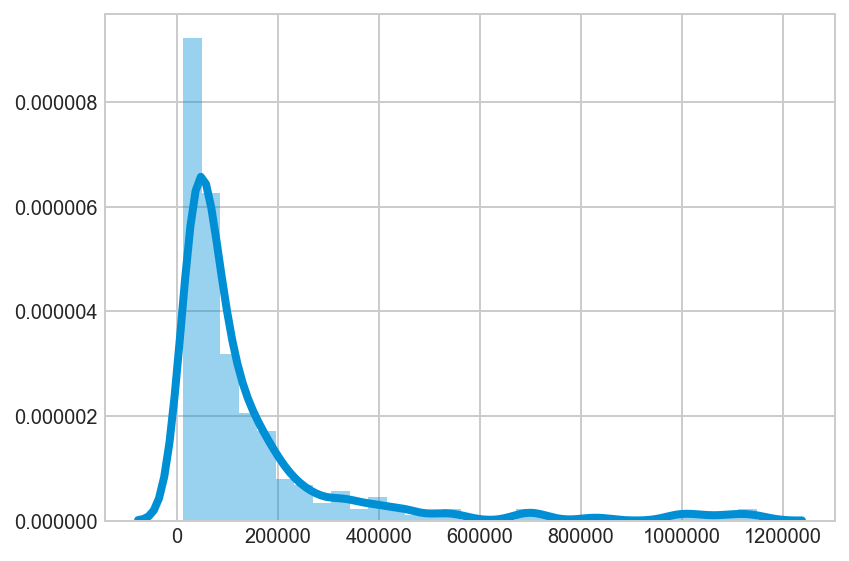

In [19]:
sns.distplot(dsum)